### Helper Functions For Preprocessing Data

In [1]:
from helper_functions import *

ModuleNotFoundError: No module named 'helper_functions'

### Preprocessing

Load Data

In [24]:
labels = pd.read_csv('../data/data.info.labelled')
labels.head(3)

,gene_id,transcript_id,transcript_position,label
0,ENSG00000004059,ENST00000000233,244,0
1,ENSG00000004059,ENST00000000233,261,0
2,ENSG00000004059,ENST00000000233,316,0


In [25]:
df = load_data_to_dataframe('../data/dataset0.json.gz')
df.head(3)

,transcript_id,position,sequence,reads
0,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0..."
1,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0...."
2,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0..."


Assign labels to the data

In [26]:
df = combine_data(df, labels)
df.head(3)

,gene_id,transcript_id,position,sequence,reads,label
0,ENSG00000004059,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0...",0
1,ENSG00000004059,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0....",0
2,ENSG00000004059,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0...",0


Extract mean reads

In [27]:
df = extract_mean_reads(df)
df.head(3)

,gene_id,transcript_id,position,sequence,reads,label,mean_reads
0,ENSG00000004059,ENST00000000233,244,AAGACCA,"[[0.00299, 2.06, 125.0, 0.0177, 10.4, 122.0, 0...",0,"[0.008264378378378385, 4.223783783783786, 123...."
1,ENSG00000004059,ENST00000000233,261,CAAACTG,"[[0.0126, 1.95, 111.0, 0.0125, 1.27, 108.0, 0....",0,"[0.006609244186046515, 3.2164244186046504, 109..."
2,ENSG00000004059,ENST00000000233,316,GAAACAG,"[[0.00432, 2.02, 104.0, 0.00299, 3.56, 99.3, 0...",0,"[0.0075699999999999995, 2.94054054054054, 105...."


In [28]:
# Create a temporary DataFrame by expanding the mean_reads array into separate columns
mean_read_features = pd.DataFrame(df['mean_reads'].to_list(), columns=[f'mean_read_{i+1}' for i in range(9)])

# Combine the label and signal features into a temporary DataFrame
temp_df = pd.concat([mean_read_features, df['label']], axis=1)

# Check the structure of the temporary DataFrame
print(temp_df.head())


   mean_read_1  mean_read_2  mean_read_3  mean_read_4  mean_read_5  \
0     0.008264     4.223784   123.702703     0.009373     7.382162   
1     0.006609     3.216424   109.681395     0.006813     3.226535   
2     0.007570     2.940541   105.475676     0.007416     3.642703   
3     0.010620     6.476350   129.355000     0.008632     2.899200   
4     0.010701     6.415051   117.924242     0.011479     5.870303   

   mean_read_6  mean_read_7  mean_read_8  mean_read_9  label  
0   125.913514     0.007345     4.386989    80.570270      0  
1   107.889535     0.007710     3.016599    94.290698      0  
2    98.947027     0.007555     2.087146    89.364324      0  
3    97.836500     0.006102     2.236520    89.154000      0  
4   121.954545     0.010019     4.260253    85.178788      0  


In [29]:
from scipy.stats import ttest_ind

# Loop over each `mean_read_i` feature and perform a t-test
for i in range(9):
    modified = temp_df[temp_df['label'] == 1][f'mean_read_{i+1}']
    unmodified = temp_df[temp_df['label'] == 0][f'mean_read_{i+1}']
    t_stat, p_value = ttest_ind(modified, unmodified, equal_var=False)  # Use Welch’s t-test
    print(f"mean_read_{i+1}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4e}")

mean_read_1: t-statistic = 12.20, p-value = 7.9977e-34
mean_read_2: t-statistic = 12.62, p-value = 4.4368e-36
mean_read_3: t-statistic = 51.35, p-value = 0.0000e+00
mean_read_4: t-statistic = 6.97, p-value = 3.4780e-12
mean_read_5: t-statistic = -3.85, p-value = 1.1689e-04
mean_read_6: t-statistic = 29.66, p-value = 3.4883e-181
mean_read_7: t-statistic = 13.20, p-value = 3.1522e-39
mean_read_8: t-statistic = 2.79, p-value = 5.2138e-03
mean_read_9: t-statistic = 9.65, p-value = 7.3933e-22


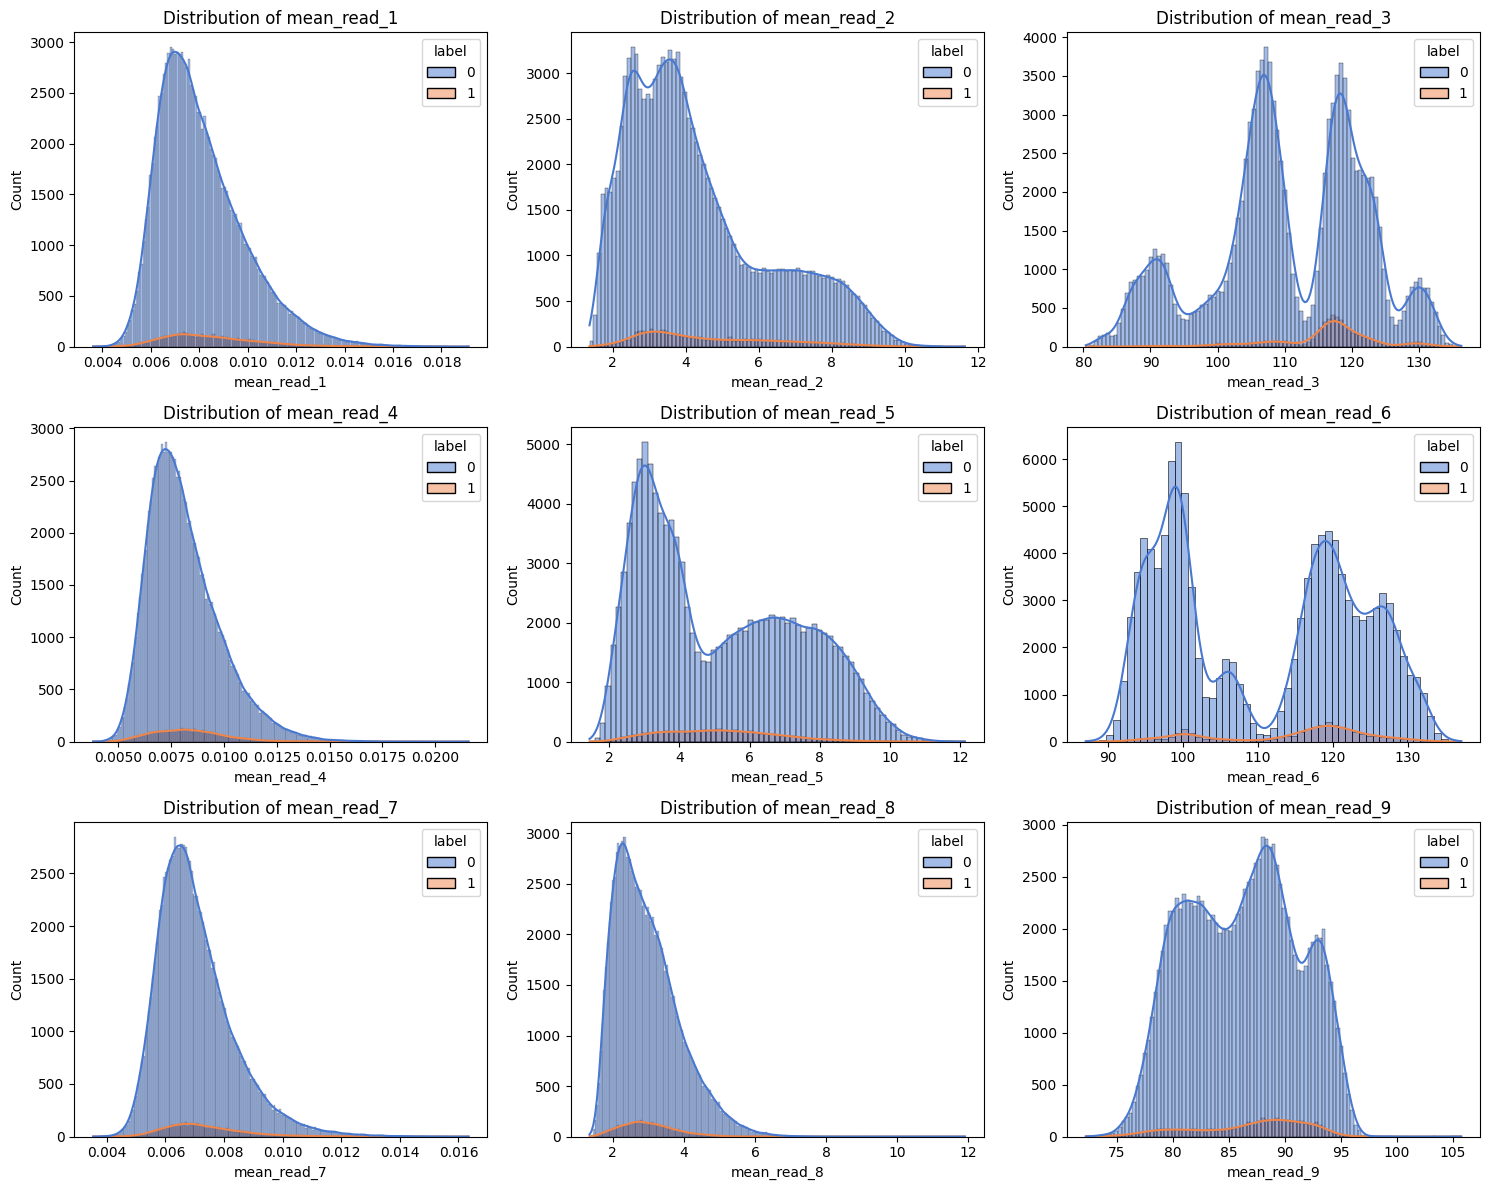

C:\Users\L14\AppData\Local\Temp\ipykernel_24668\613227881.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=f'mean_read_{i+1}', data=temp_df, ax=axes[i], palette='muted')
C:\Users\L14\AppData\Local\Temp\ipykernel_24668\613227881.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=f'mean_read_{i+1}', data=temp_df, ax=axes[i], palette='muted')
C:\Users\L14\AppData\Local\Temp\ipykernel_24668\613227881.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=f'mean_read_{i+1}', data=temp_df, ax=axes[i], pal

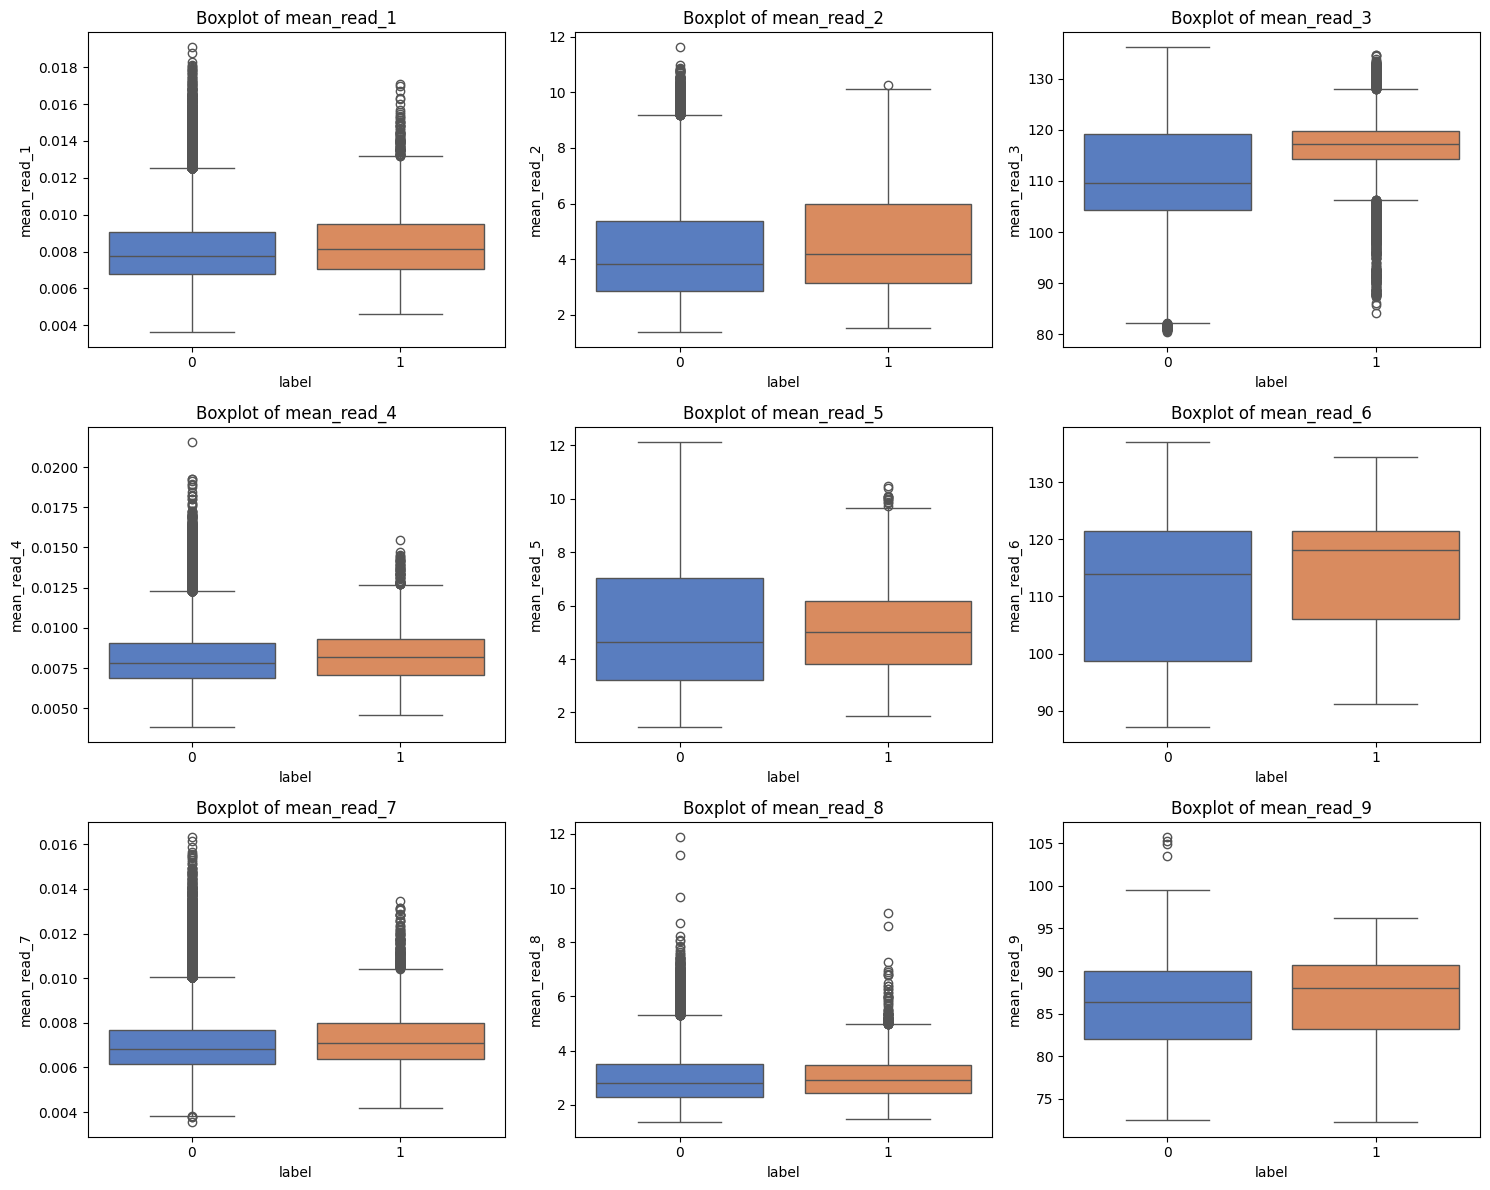

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each `mean_read` feature
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i in range(9):
    sns.histplot(data=temp_df, x=f'mean_read_{i+1}', hue='label', kde=True, ax=axes[i], palette='muted')
    axes[i].set_title(f"Distribution of mean_read_{i+1}")
plt.tight_layout()
plt.show()

# Plot boxplots for each `mean_read` feature
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i in range(9):
    sns.boxplot(x='label', y=f'mean_read_{i+1}', data=temp_df, ax=axes[i], palette='muted')
    axes[i].set_title(f"Boxplot of mean_read_{i+1}")
plt.tight_layout()
plt.show()


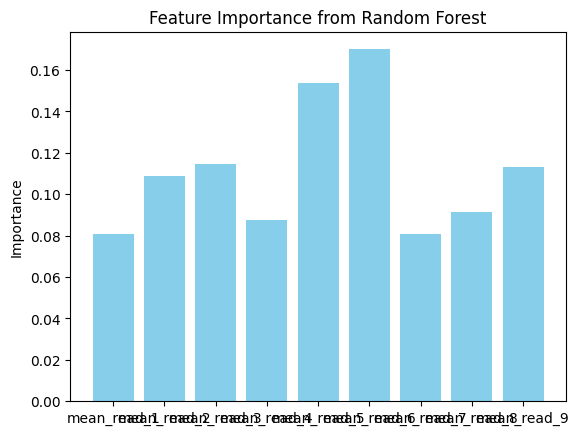

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Define features and labels
X = temp_df[[f'mean_read_{i+1}' for i in range(9)]]
y = temp_df['label']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importances
importances = model.feature_importances_
plt.bar([f'mean_read_{i+1}' for i in range(9)], importances, color='skyblue')
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.show()


One hot encode middle sequence (DRACH motif)

In [2]:
# read in the respecitve data (a549.csv, hct116.csv, hepg2.csv, k562.csv and mcf7.csv) where their columns are all transcript_id, position, prediction, combine it into transcript_id, position, prediction_score, and cell_line.
import pandas as pd
a549 = pd.read_csv('a549.csv')
hct116 = pd.read_csv('hct116.csv')
hepg2 = pd.read_csv('hepg2.csv')
k562 = pd.read_csv('k562.csv')
mcf7 = pd.read_csv('mcf7.csv')

# add cell line column to each data
a549['cell_line'] = 'a549'
hct116['cell_line'] = 'hct116'
hepg2['cell_line'] = 'hepg2'
k562['cell_line'] = 'k562'
mcf7['cell_line'] = 'mcf7'

# combine all the data into one
all_data = pd.concat([a549, hct116, hepg2, k562, mcf7])
all_data.head(3)
all_data.to_csv('all_data.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2, venn3

all_data = pd.read_csv("all_data.csv")
# Define a prediction score threshold to identify high-confidence m6A sites
threshold = 0.8

# Filter the combined dataset to include only high-confidence m6A sites
high_confidence_sites = all_data[all_data['prediction'] > threshold]

# Display the first few rows of the high-confidence sites
high_confidence_sites.head(3)

ImportError: cannot import name 'venn5' from 'matplotlib_venn' (c:\Users\L14\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib_venn\__init__.py)

# Identify Conserved m6A Sites Across Cell Lines
Group the combined dataset by transcript_id and position, then check which sites have high-confidence modifications in multiple cell lines. Count the number of cell lines where the modification meets the threshold.

In [6]:
# Group the combined dataset by transcript_id and position
grouped_data = high_confidence_sites.groupby(['transcript_id', 'position'])

# Count the number of cell lines where the modification meets the threshold
conserved_sites = grouped_data['cell_line'].nunique().reset_index()

# Rename the columns for clarity
conserved_sites.columns = ['transcript_id', 'position', 'cell_line_count']

# Display the first few rows of the conserved sites
conserved_sites.head(3)

,transcript_id,position,cell_line_count
0,ENST00000000412,2440,4
1,ENST00000000412,2580,4
2,ENST00000000412.7,2440,1


# Analyze Unique Modifications Per Cell Line
Identify (transcript_id, position) pairs with high-confidence modification scores in only one cell line.

C:\Users\L14\AppData\Local\Temp\ipykernel_2076\746062107.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_modifications_per_cell_line, x='cell_line', y='unique_modification_count', palette='viridis')


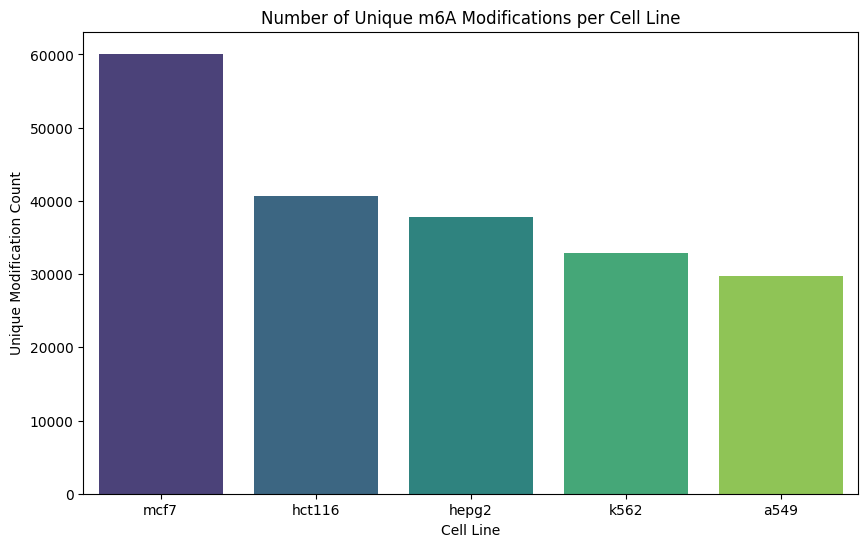

In [7]:
# Identify (transcript_id, position) pairs with high-confidence modification scores in only one cell line
unique_sites = high_confidence_sites.groupby(['transcript_id', 'position']).filter(lambda x: len(x) == 1)

# Display the first few rows of the unique sites
unique_sites.head(3)

# Count the number of unique modifications per cell line
unique_modifications_per_cell_line = unique_sites['cell_line'].value_counts().reset_index()

# Rename the columns for clarity
unique_modifications_per_cell_line.columns = ['cell_line', 'unique_modification_count']

# Display the unique modifications per cell line
unique_modifications_per_cell_line

# Plot the number of unique m6A modifications per cell line
plt.figure(figsize=(10, 6))
sns.barplot(data=unique_modifications_per_cell_line, x='cell_line', y='unique_modification_count', palette='viridis')
plt.title('Number of Unique m6A Modifications per Cell Line')
plt.xlabel('Cell Line')
plt.ylabel('Unique Modification Count')
plt.show()

# Visualization
Create visualizations to represent the data.

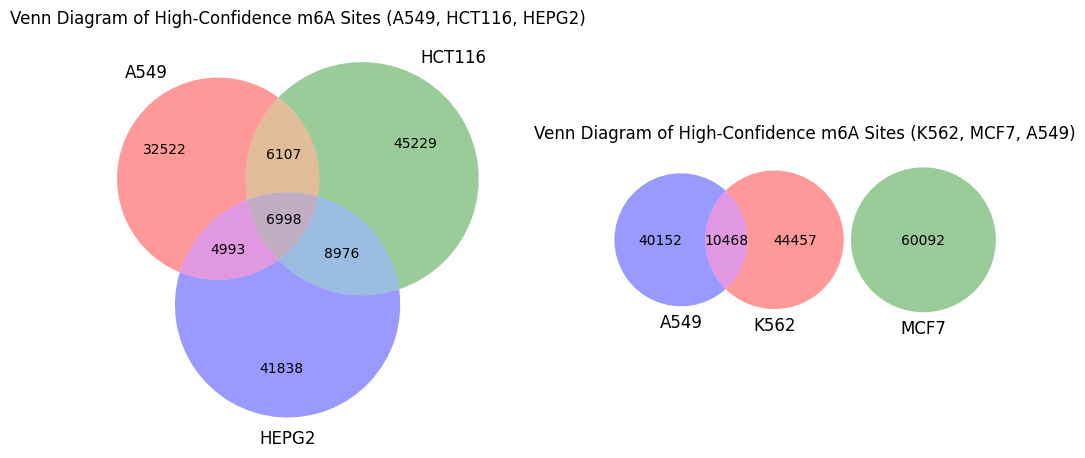

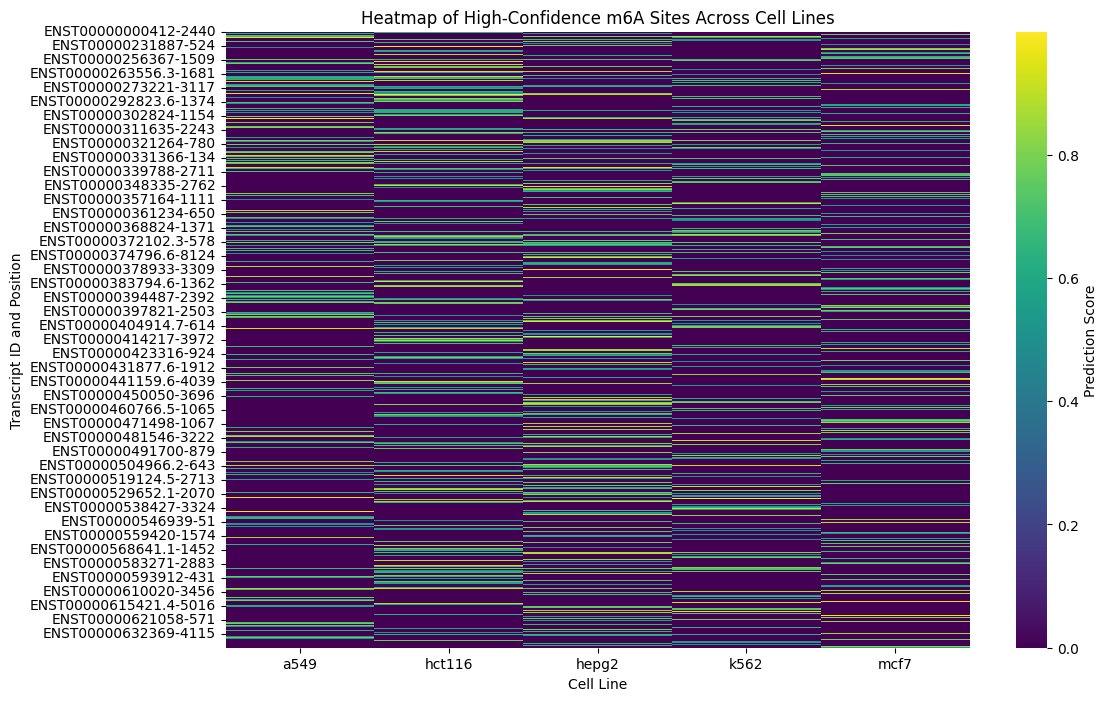

In [13]:
# Venn Diagrams: Visualize the shared and unique high-confidence m6A sites across cell lines
# Create sets of (transcript_id, position) pairs for each cell line
a549_sites = set(high_confidence_sites[high_confidence_sites['cell_line'] == 'a549'][['transcript_id', 'position']].apply(tuple, axis=1))
hct116_sites = set(high_confidence_sites[high_confidence_sites['cell_line'] == 'hct116'][['transcript_id', 'position']].apply(tuple, axis=1))
hepg2_sites = set(high_confidence_sites[high_confidence_sites['cell_line'] == 'hepg2'][['transcript_id', 'position']].apply(tuple, axis=1))
k562_sites = set(high_confidence_sites[high_confidence_sites['cell_line'] == 'k562'][['transcript_id', 'position']].apply(tuple, axis=1))
mcf7_sites = set(high_confidence_sites[high_confidence_sites['cell_line'] == 'mcf7'][['transcript_id', 'position']].apply(tuple, axis=1))

# Plot Venn diagrams for three cell lines at a time
plt.figure(figsize=(12, 6))
plt.subplot(121)
venn3([a549_sites, hct116_sites, hepg2_sites], ('A549', 'HCT116', 'HEPG2'))
plt.title('Venn Diagram of High-Confidence m6A Sites (A549, HCT116, HEPG2)')

plt.subplot(122)
venn3([k562_sites, mcf7_sites, a549_sites], ('K562', 'MCF7', 'A549'))
plt.title('Venn Diagram of High-Confidence m6A Sites (K562, MCF7, A549)')

plt.show()


# Heatmap for Conserved Sites: Show which modifications are conserved across multiple cell lines
# Create a pivot table for the heatmap
heatmap_data = high_confidence_sites.pivot_table(index=['transcript_id', 'position'], columns='cell_line', values='prediction', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Prediction Score'})
plt.title('Heatmap of High-Confidence m6A Sites Across Cell Lines')
plt.xlabel('Cell Line')
plt.ylabel('Transcript ID and Position')
plt.show()

            transcript_id  frequency
0         ENST00000000412          8
1       ENST00000000412.7          2
2         ENST00000000442          6
3      ENST00000000442.10          1
4         ENST00000001146          5
...                   ...        ...
69747     ENST00000642143          1
69748             R1_24_1          1
69749             R1_42_2          2
69750             R1_73_2          1
69751             R2_19_2          1

[69752 rows x 2 columns]


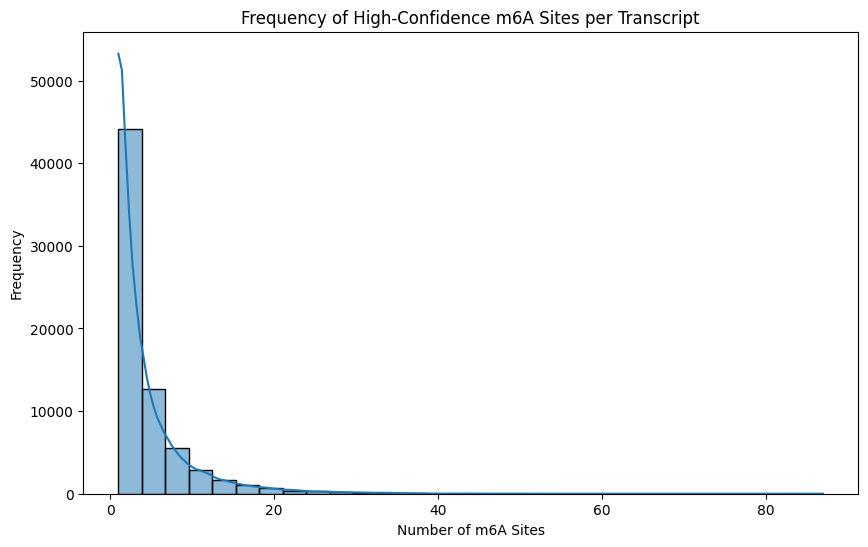

In [9]:
# Assuming 'all_data' is already defined and contains the combined dataset

# Set Prediction Score Threshold
threshold = 0.5

# Identify High-Confidence m6A Sites
high_confidence_sites = all_data[all_data['prediction'] > threshold]

# Calculate Frequency of m6A Sites per Transcript
frequency_per_transcript = high_confidence_sites.groupby('transcript_id').size().reset_index(name='frequency')

# Display the frequency of m6A sites per transcript
print(frequency_per_transcript)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(frequency_per_transcript['frequency'], bins=30, kde=True)
plt.title('Frequency of High-Confidence m6A Sites per Transcript')
plt.xlabel('Number of m6A Sites')
plt.ylabel('Frequency')
plt.show()

# Biological Interpretation
Interpret the biological significance of conserved and unique modifications, considering the functions of the genes involved.

In [10]:
# Biological Interpretation

# Interpret the biological significance of conserved modifications
conserved_genes = conserved_sites.merge(all_data[['transcript_id', 'cell_line']], on='transcript_id').drop_duplicates()
conserved_gene_counts = conserved_genes['transcript_id'].value_counts().reset_index()
conserved_gene_counts.columns = ['transcript_id', 'count']

# Display the top conserved genes
top_conserved_genes = conserved_gene_counts.head(10)
top_conserved_genes

# Interpret the biological significance of unique modifications
unique_genes = unique_sites.merge(all_data[['transcript_id', 'cell_line']], on='transcript_id').drop_duplicates()
unique_gene_counts = unique_genes['transcript_id'].value_counts().reset_index()
unique_gene_counts.columns = ['transcript_id', 'count']

# Display the top unique genes
top_unique_genes = unique_gene_counts.head(10)
top_unique_genes

,transcript_id,count
0,ENST00000378024,212
1,ENST00000597346,164
2,ENST00000441802,152
3,ENST00000626826,124
4,ENST00000244364,116
5,ENST00000614102,112
6,ENST00000264501,108
7,ENST00000382292,108
8,ENST00000368653,100
9,ENST00000357162,100
